In [165]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

%matplotlib inline

### Load Data
Data Description: <a href='https://www.kaggle.com/hmavrodiev/london-bike-sharing-dataset'>Click Here</a>

In [166]:
df = pd.read_csv('C:/Users/jabchoi/Documents/data_set/london_merged.csv')
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [167]:
# Check data type for each cols
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
timestamp       17414 non-null object
cnt             17414 non-null int64
t1              17414 non-null float64
t2              17414 non-null float64
hum             17414 non-null float64
wind_speed      17414 non-null float64
weather_code    17414 non-null float64
is_holiday      17414 non-null float64
is_weekend      17414 non-null float64
season          17414 non-null float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


### Check Null value

In [168]:
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

### Scatter Plot
This is to look at the relationship b/w each cols through the scatter plot

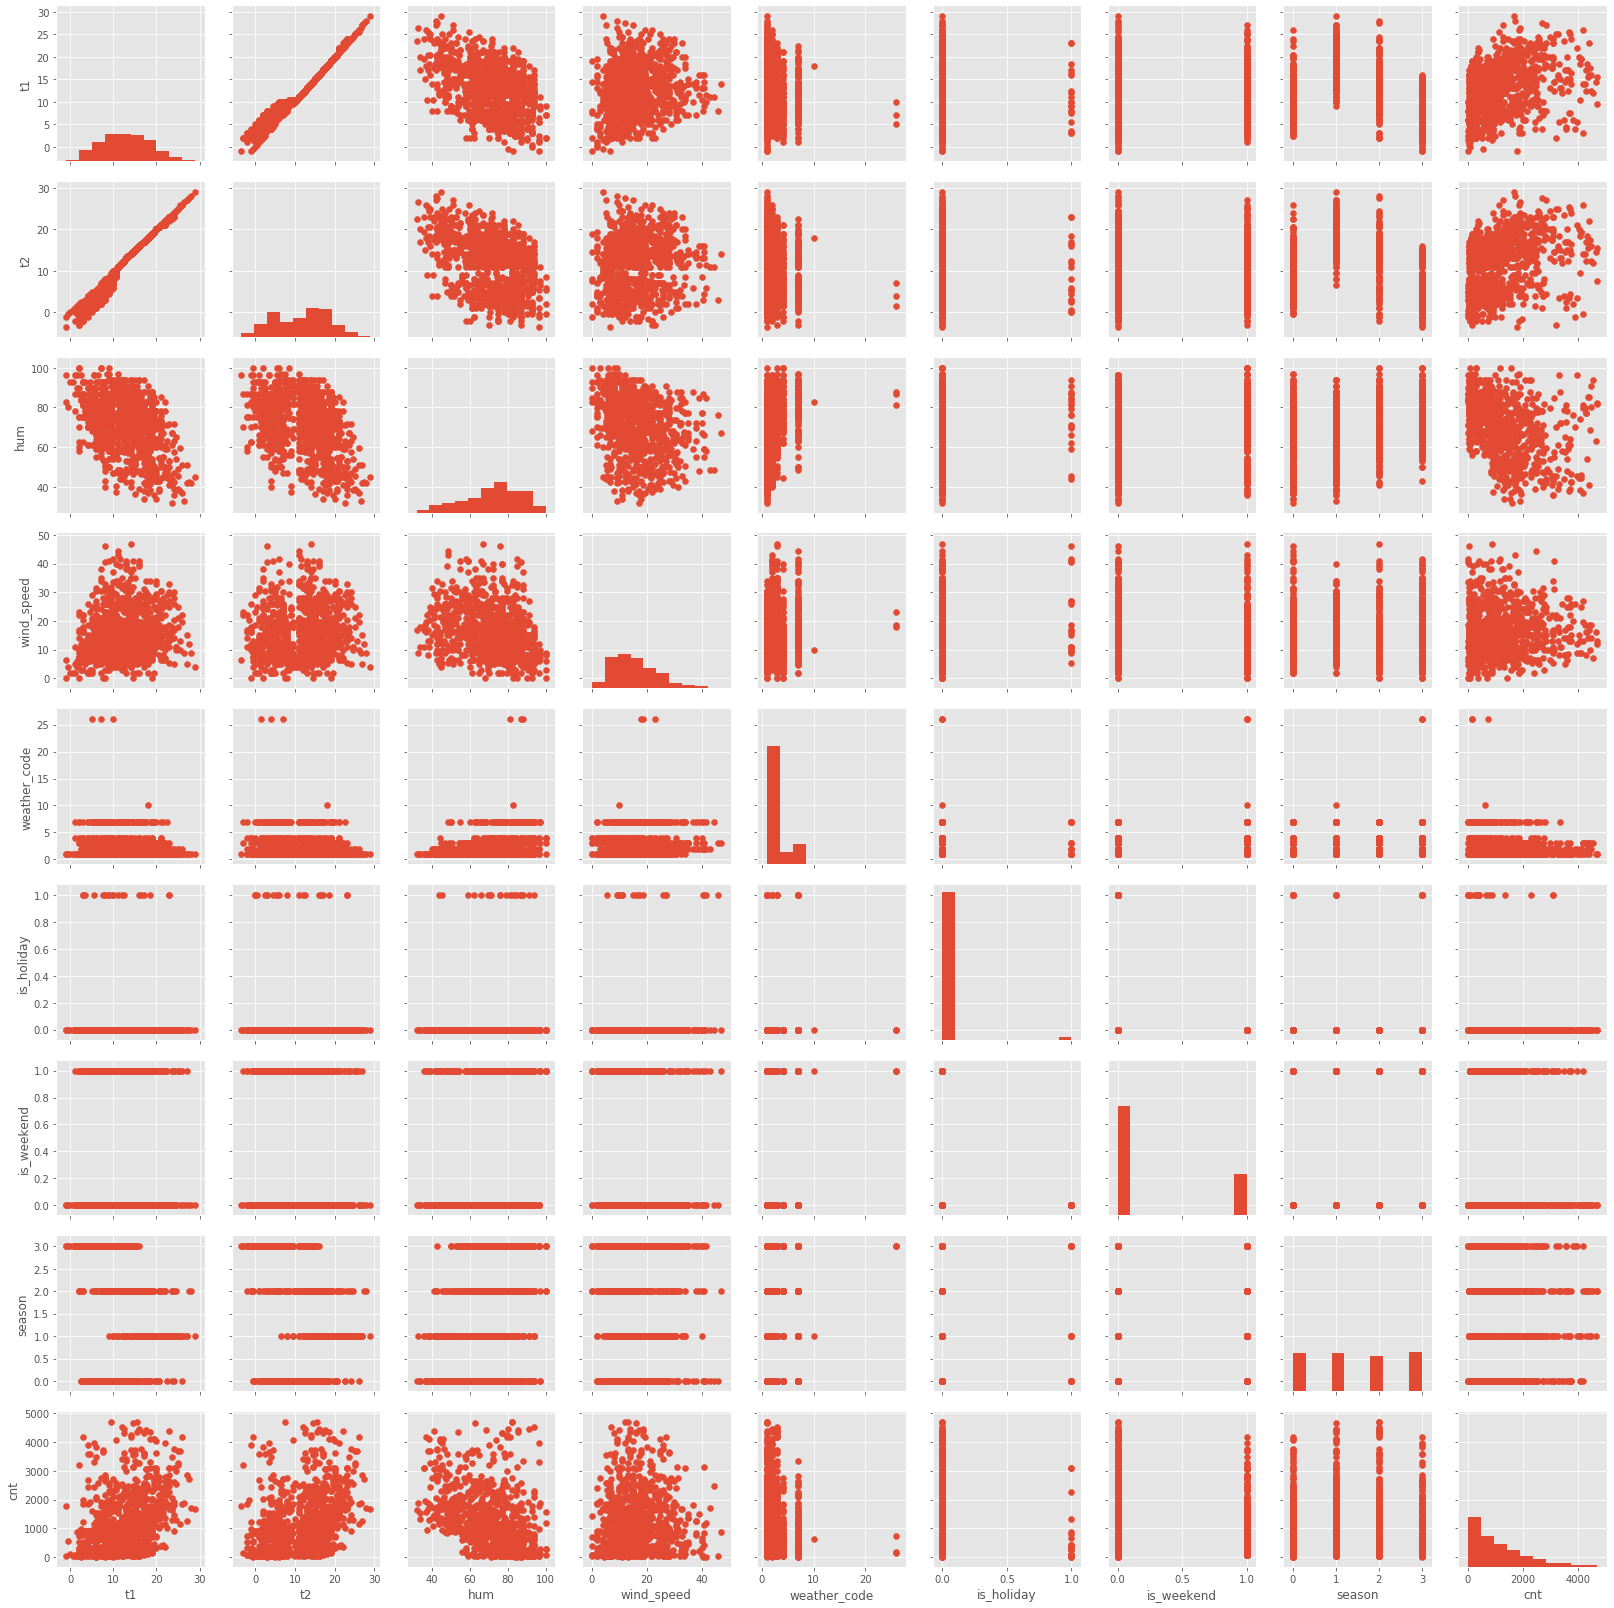

In [169]:
data_sample = df.sample(1000)

p = sns.PairGrid(data_sample, vars=['t1', 't2', 'hum', 'wind_speed', 'weather_code', 'is_holiday', 'is_weekend','season', 'cnt'])
p.map_diag(plt.hist)
p.map_offdiag(plt.scatter)

### Split timestamp into 'month','day' and 'hour'

In [170]:
df['timestamp'] = df['timestamp'].apply(lambda x: datetime.datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S'))
df['month'] = df['timestamp'].apply(lambda x: str(x).split(' ')[0].split('-')[1])
df['day'] = df['timestamp'].apply(lambda x: str(x).split(' ')[0].split('-')[2])
df['hour'] = df['timestamp'].apply(lambda x: str(x).split(' ')[1].split(':')[0])

### Boxplot
Use boxplot showing how often people use bike share service monthly, daily and hourly

Text(0, 0.5, '# of bike share use')

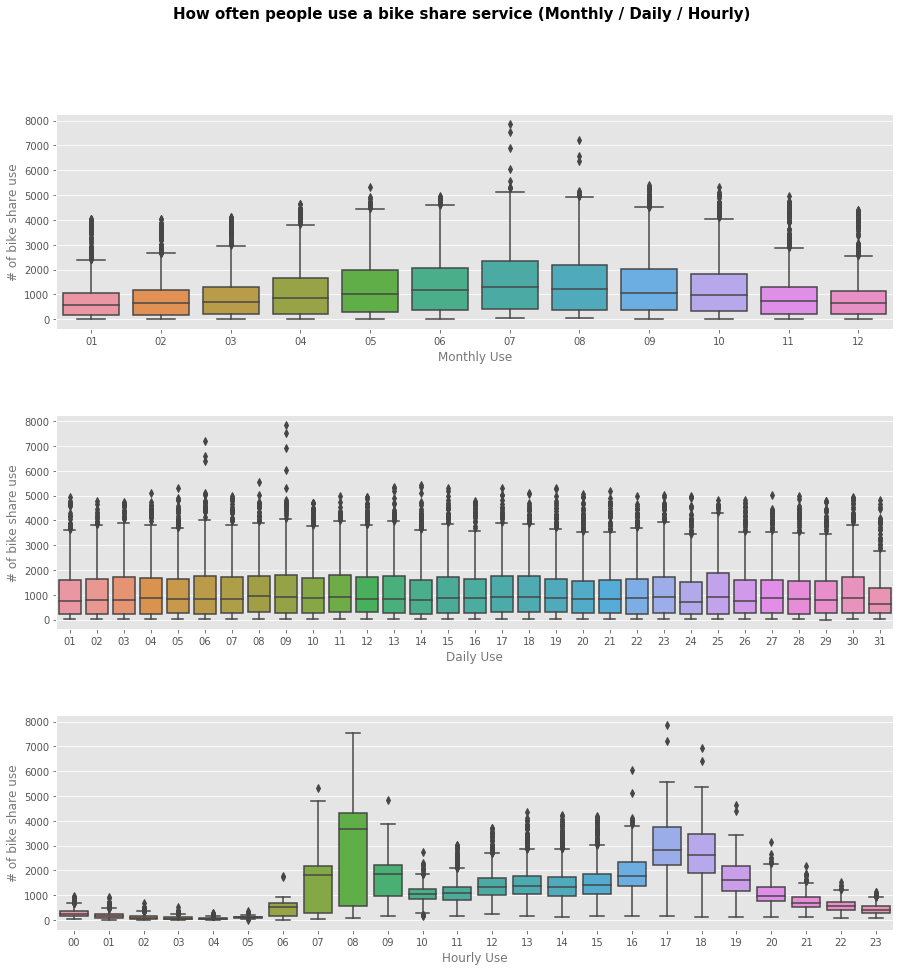

In [171]:
figure, (ax1, ax2, ax3) = plt.subplots(3)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
figure.set_size_inches(15, 15)

figure.suptitle('How often people use a bike share service (Monthly / Daily / Hourly)', fontsize=15, fontweight='bold')

sns.boxplot(data=df, x='month', y='cnt', ax=ax1)
sns.boxplot(data=df, x='day', y='cnt', ax=ax2)
sns.boxplot(data=df, x='hour', y='cnt', ax=ax3)

ax1.set_xlabel('Monthly Use', size=12, alpha=0.8)
ax2.set_xlabel('Daily Use', size=12, alpha=0.8)
ax3.set_xlabel('Hourly Use', size=12, alpha=0.8)

ax1.set_ylabel('# of bike share use', size=12, alpha=0.8)
ax2.set_ylabel('# of bike share use', size=12, alpha=0.8)
ax3.set_ylabel('# of bike share use', size=12, alpha=0.8)

##### Let's use pointplot to see the number of bike share use 'hourly' depending on whether or not it's on holiday / weekend

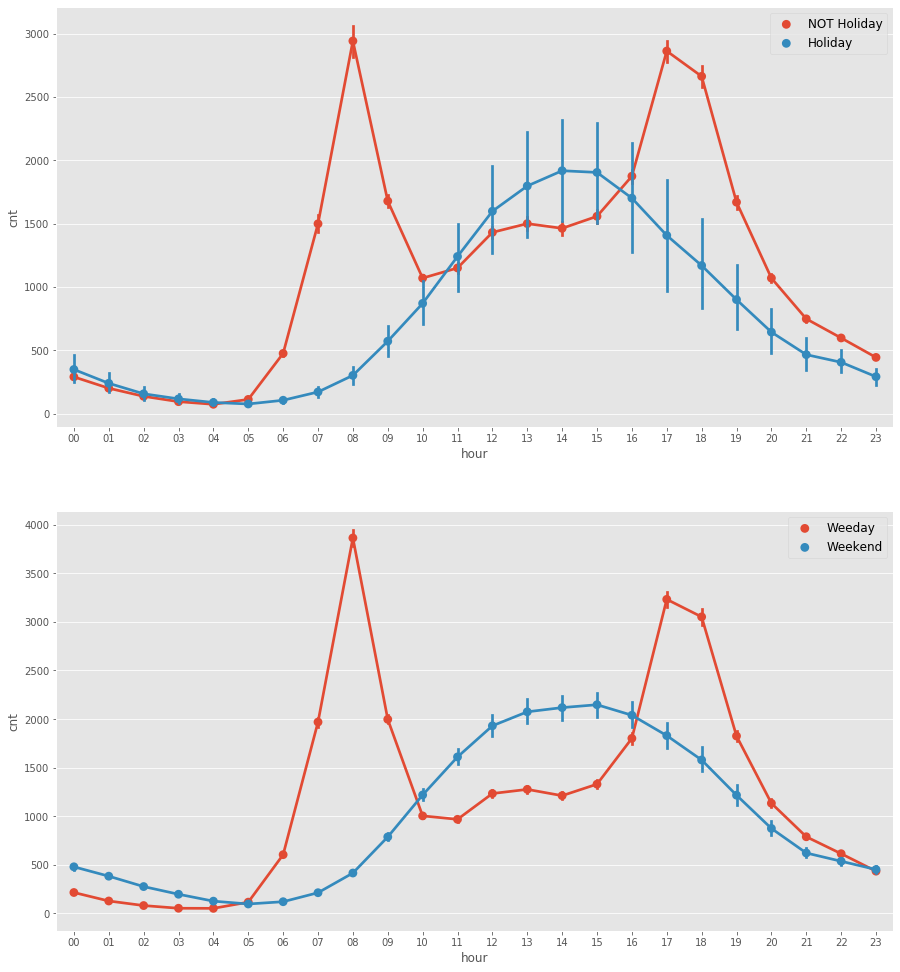

In [172]:
import matplotlib.patches as mpatches

figure, (ax1, ax2) = plt.subplots(2)
figure.set_size_inches(15, 17)

sns.pointplot(data=df, x='hour', y='cnt', hue='is_holiday', ax=ax1)
sns.pointplot(data=df, x='hour', y='cnt', hue='is_weekend', ax=ax2)

handles, labels = ax1.get_legend_handles_labels()
labels[:] = 'NOT Holiday', 'Holiday'
ax1.legend(handles, labels, fontsize=12)

handles, labels = ax2.get_legend_handles_labels()
labels[:] = 'Weeday', 'Weekend' 
ax2.legend(handles, labels, fontsize=12)

* Result of 'is_holiday': The use of bike share on holiday is high between 13 to 15 pm. On the other hand, it is high during commuting in regular day (Not holiday)

* Result of 'is_weekend': The use of bike share on weekend is similar with result of 'holiday'. Same on weekday (similar with result of 'Not holiday')

##### Let's use pointplot to see the number of bike share use depending on 'season' 

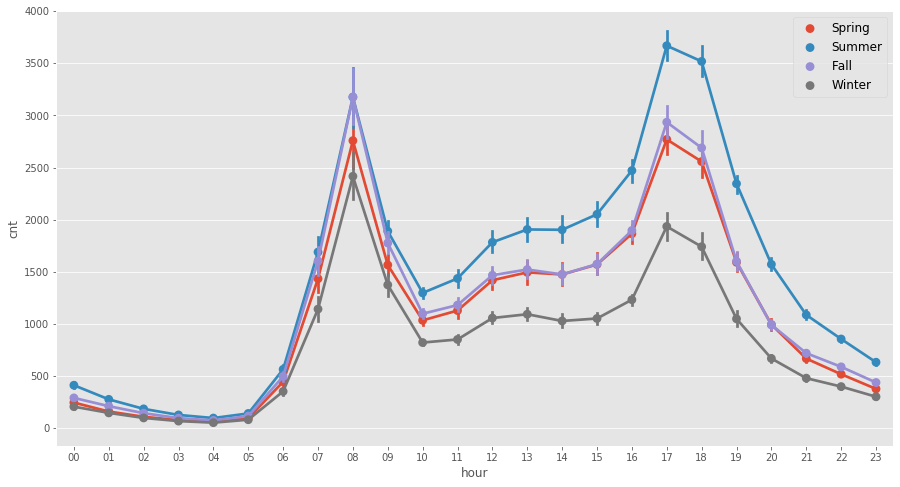

In [180]:
figure, (ax) = plt.subplots(1)
figure.set_size_inches(15, 8)

sns.pointplot(data=df, x='hour', y='cnt', hue='season', ax=ax)

handles, labels = ax.get_legend_handles_labels()
labels[:] = 'Spring', 'Summer', 'Fall', 'Winter'
ax.legend(handles, labels, fontsize=12)

* Result: It is telling us people use a bike share service in Summer the most. Fall, Spring and winter are going after it. 